In [ ]:
%reset -f
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

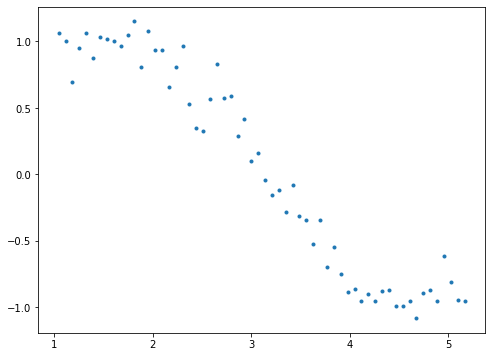

In [ ]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 12, 10

#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducibility
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.figure(figsize=(8, 6))
plt.plot(data['x'],data['y'],'.')
plt.show()

In [ ]:
data.head()

,x,y
0,1.047198,1.065763
1,1.117011,1.006086
2,1.186824,0.695374
3,1.256637,0.949799
4,1.326450,1.063496


In [ ]:
for i in range(2,16):  #power of 1 is already there
    colname = 'x_'+str(i)      #new var will be x_power
    data[colname] = data['x']**i
data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


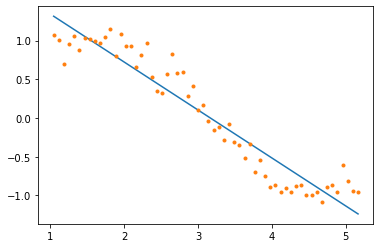

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(data[['x']],data[['y']])
y_pred = linreg.predict(data[['x']])

plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

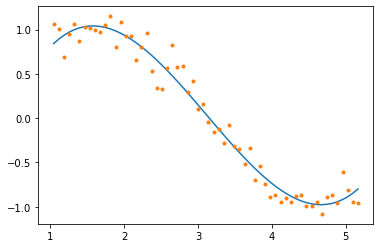

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
linreg.fit(data[['x','x_2','x_3']],data[['y']])
y_pred = linreg.predict(data[['x','x_2','x_3']])

plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

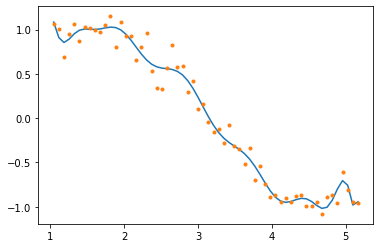

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(normalize=True)
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,15+1)])
linreg.fit(data[predictors],data[['y']])
y_pred = linreg.predict(data[predictors])

plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

In [ ]:
from sklearn.linear_model import Ridge
alpha_list = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alpha =alpha_list[1]

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,15+1)])

ridgereg = Ridge(alpha=alpha,normalize=True)
ridgereg.fit(data[predictors],data['y'])
y_pred = ridgereg.predict(data[predictors])

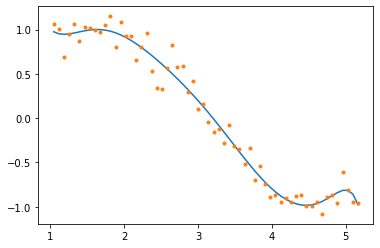

In [ ]:
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')

In [ ]:
from sklearn.linear_model import Lasso
alpha_list = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
alpha =1

predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,15+1)])

lassoreg = Lasso(alpha=alpha,normalize=True, max_iter=1e5)
lassoreg.fit(data[predictors],data['y'])
y_pred = lassoreg.predict(data[predictors])

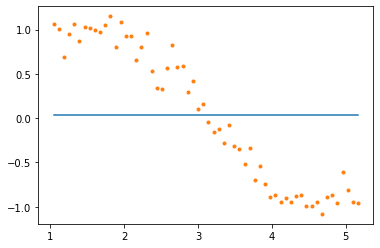

In [ ]:
plt.plot(data[['x']],y_pred)
plt.plot(data[['x']],data[['y']],'.')